# bom_movie_gross, tmdb_movies


# Load Data 
    Dictionary loading
    SQLITE3 Database
    Pandas read_csv

In [61]:
import os 
import numpy as np
import pandas as pd
from glob import glob 

import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [63]:
#create a variable that lists all the files in the zipped file folder

zipped_data = os.listdir(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData")
print(zipped_data)

['bom.movie_gross.csv', 'imdb.name.basics.csv', 'rt.movie_info.tsv', 'rt.reviews.tsv', 'title.akas.csv', 'title.basics.csv', 'title.crew.csv', 'title.principals.csv', 'title.ratings.csv', 'tmdb.movies.csv', 'tn.movie_budgets.csv']


In [64]:
#Short form way of loading multiple files - DO THIS
#Problem is how do i assign these dictionaries to be workable lists like below?

csv_files = glob(r"zippedData\*.csv")
csv_files 

['zippedData\\bom.movie_gross.csv',
 'zippedData\\imdb.name.basics.csv',
 'zippedData\\title.akas.csv',
 'zippedData\\title.basics.csv',
 'zippedData\\title.crew.csv',
 'zippedData\\title.principals.csv',
 'zippedData\\title.ratings.csv',
 'zippedData\\tmdb.movies.csv',
 'zippedData\\tn.movie_budgets.csv']

In [65]:
#Create a dictionary, populate with cleaned filenames 
#Change . to _
#
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [66]:
bom_movie_gross = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\bom.movie_gross.csv")
tmdb_movies = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\tmdb.movies.csv", parse_dates=True)

In [67]:
#we need to convert the foreign_gross to float64, maybe we need to change title and studio to string as well
bom_movie_gross.dtypes 

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [68]:
#Code that converts comma to empty space 

bom_movie_gross['foreign_gross'] = bom_movie_gross.foreign_gross.str.replace(',', '').astype(float)

In [69]:
#You can see the dtypes have changed 
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

# Looking at max, min and distributions

In [70]:
highest_dom_gross = bom_movie_gross['domestic_gross'].max()
print(highest_dom_gross)

936700000.0


In [71]:
bom_movie_gross['domestic_gross'].min()

100.0

In [72]:
bom_movie_gross['domestic_gross'].mean()

28745845.06698422

Text(0.5, 1.0, 'Boxplot of Domestic Gross')

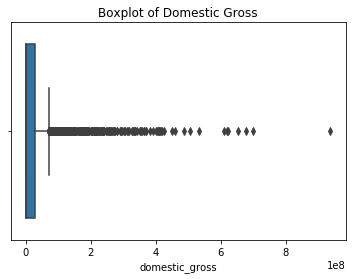

In [73]:
sns.boxplot(bom_movie_gross['domestic_gross']) #read into boxplot 
plt.title('Boxplot of Domestic Gross')

In [74]:
bom_movie_gross.groupby(['domestic_gross']).max()

,title,studio,foreign_gross,year
domestic_gross,,,,
100.0,Storage 24,Magn.,NaN,2013
300.0,The Chambermaid,Magn.,NaN,2016
400.0,Apartment 143,Magn.,426000.0,2017
500.0,Max & Leon,Distrib.,NaN,2017
600.0,Death of a Superhero,Trib.,NaN,2012
...,...,...,...,...
623400000.0,Marvel's The Avengers,BV,895500000.0,2012
652300000.0,Jurassic World,Uni.,1019.4,2015
678800000.0,Avengers: Infinity War,BV,1369.5,2018


In [75]:
bom_movie_gross.min()

title              '71
domestic_gross     100
foreign_gross      600
year              2010
dtype: object

# Creating New Columns for bom_movie_gross
    Columns created are 'total_gross'

In [76]:
#create new column for total gross 

bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


# What is the distribution of revenue across the film industry? 

Skewed to the left indicating a huge range of results, especially big successes

Extreme outliers indicate big winners and big losers 


In [77]:
data = bom_movie_gross['total_gross']
data2 = bom_movie_gross['title']

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1556.,  219.,   94.,   46.,   39.,   23.,   14.,    9.,    7.,
           2.]),
 array([4.90000000e+03, 1.51894410e+08, 3.03783920e+08, 4.55673430e+08,
        6.07562940e+08, 7.59452450e+08, 9.11341960e+08, 1.06323147e+09,
        1.21512098e+09, 1.36701049e+09, 1.51890000e+09]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Histogram of Total Gross from BOM')

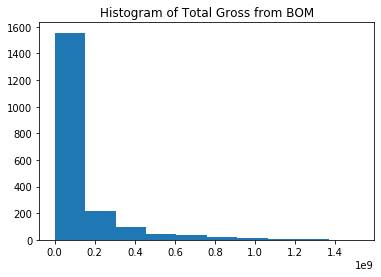

In [78]:
plt.hist(data, bins=10)
plt.title('Histogram of Total Gross from BOM')
plt.show()

Text(0.5, 1.0, 'Scatter plot of domestic gross and foreign gross ')

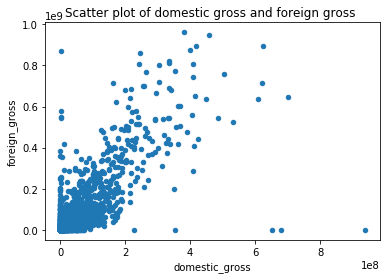

In [79]:
#Scatter plot of domestic gross and foreign gross 

bom_movie_gross.plot.scatter(x = 'domestic_gross', 
                            y = 'foreign_gross')

plt.title('Scatter plot of domestic gross and foreign gross ')

In [80]:
#Need to remove duplicate 
bom_movie_gross['title'].value_counts() 

Bluebeard                                             2
Percy Jackson & The Olympians: The Lightning Thief    1
Youth in Revolt                                       1
Diana Vreeland: The Eye Has to Travel                 1
Cedar Rapids                                          1
                                                     ..
My Piece of the Pie                                   1
Terraferma                                            1
All the Money in the World                            1
Movie 43                                              1
Atomic Blonde                                         1
Name: title, Length: 3386, dtype: int64

In [81]:
bom_movie_gross['title'].value_counts()

Bluebeard                                             2
Percy Jackson & The Olympians: The Lightning Thief    1
Youth in Revolt                                       1
Diana Vreeland: The Eye Has to Travel                 1
Cedar Rapids                                          1
                                                     ..
My Piece of the Pie                                   1
Terraferma                                            1
All the Money in the World                            1
Movie 43                                              1
Atomic Blonde                                         1
Name: title, Length: 3386, dtype: int64

In [82]:
total_gross = bom_movie_gross.groupby(['total_gross'])

# Who are the most successful studios? 
    Distribution indicates presence of big winners 

In [83]:
#Created variable Studio Gross

studio_gross = bom_movie_gross.groupby('studio')['total_gross'].sum().reset_index(name='sum')
studio_gross.head()

,studio,sum
0,3D,16000000.0
1,A23,0.0
2,A24,498919000.0
3,ADC,0.0
4,AF,4655000.0


In [84]:
#Create a list of all the unique studio names 
#Sum the total gross 
#Groupby of studio by total gross 

df1 = bom_movie_gross[['studio', 'total_gross']]

bom_movie_gross.groupby(['studio', 'total_gross']).sum()

domestic_gross  foreign_gross  year
studio total_gross                                     
3D     16000000.0        6100000.0      9900000.0  2010
A24    74700.0             12500.0        62200.0  2016
       1863000.0          663000.0      1200000.0  2016
       2133300.0           33300.0      2100000.0  2016
       3200000.0         1100000.0      2100000.0  2014
...                            ...            ...   ...
Zeit.  1517000.0          317000.0      1200000.0  2012
       2171200.0           71200.0      2100000.0  2011
       3931000.0          231000.0      3700000.0  2014
       5035000.0          435000.0      4600000.0  2010
       9375000.0          675000.0      8700000.0  2010

[1993 rows x 3 columns]

In [85]:
print('highest amount earned by any studio')
studio_gross['sum'].max()

#creating a range by unique studios
y_pos =  np.arange(len(studio_gross['studio']))
x = studio_gross['sum']

highest amount earned by any studio


44190383899.1

In [86]:
#Top Grossing Studios in Descending Orders 

studio_total_gross = bom_movie_gross.groupby('studio')['total_gross'].sum().sort_values(ascending=False)
studio_total_gross

studio
BV           4.419038e+10
Fox          3.098037e+10
WB           3.079150e+10
Uni.         2.974681e+10
Sony         2.240472e+10
                 ...     
Grav.        0.000000e+00
RLJ          0.000000e+00
TA           0.000000e+00
Dreamwest    0.000000e+00
Saban        0.000000e+00
Name: total_gross, Length: 257, dtype: float64

<BarContainer object of 257 artists>

Text(0, 0.5, 'Total Gross')

Text(0.5, 0, 'Studios')

Text(0.5, 1.0, 'Studio Total Gross Distribution')

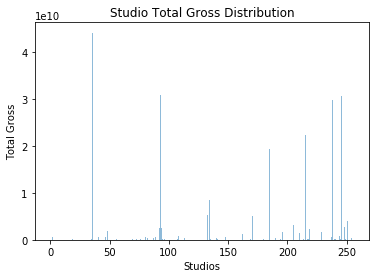

In [87]:
plt.bar(y_pos, x, align = 'center', alpha=0.5)
plt.ylabel('Total Gross')
plt.xlabel('Studios')
plt.title('Studio Total Gross Distribution')

#histogram 

In [88]:
studio_total_gross.index[:5], studio_total_gross.values[:5]

(Index(['BV', 'Fox', 'WB', 'Uni.', 'Sony'], dtype='object', name='studio'),
 array([4.41903839e+10, 3.09803666e+10, 3.07915030e+10, 2.97468092e+10,
        2.24047151e+10]))

In [89]:
#Create top 5 and Bottom 5 Tables 

top_5 = studio_total_gross.index[:5].tolist()

bottom_5 = studio_total_gross.index[-5:].tolist()
print(top_5)

bom_movie_gross.query(f'studio in {top_5}')

['BV', 'Fox', 'WB', 'Uni.', 'Sony']


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
...,...,...,...,...,...,...
3263,The Front Runner,Sony,2000000.0,1200000.0,2018,3.200000e+06
3264,2001: A Space Odyssey (2018 re-release),WB,3200000.0,NaN,2018,NaN
3289,Schindler's List (2018 re-release),Uni.,833000.0,NaN,2018,NaN
3369,Loving Pablo,Uni.,22000.0,NaN,2018,NaN


In [90]:
import datetime as dt 

In [91]:
# How many movies did the top 5 studios make on average?  

Avg_films_made = 639/5

#Over how much time? 

bom_movie_gross['year'].min()
bom_movie_gross['year'].max()

Print('Average number of Films Made Yearly by the Top 5 Studios ')
Avg_films_made/8

2010

2018

15.975

# What is the distribution of total gross in successful studios?
    Most Successful Studios have a breakaway success

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Violin Plot of Top 5 Studios')

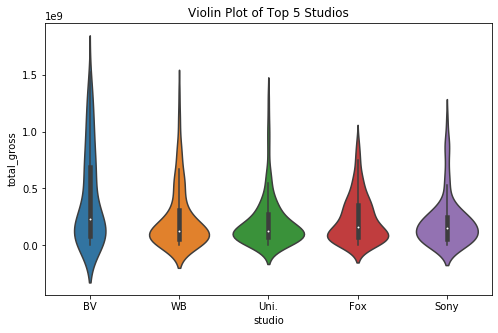

In [92]:
#Violin Plot of Top 5 Studios 

plt.figure(figsize=(8, 5))
sns.violinplot(x='studio', y='total_gross', data=bom_movie_gross.query(f'studio in {top_5}'))
plt.title('Violin Plot of Top 5 Studios')
plt.show()

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Violin Plot of Bottom 5 Studios ')

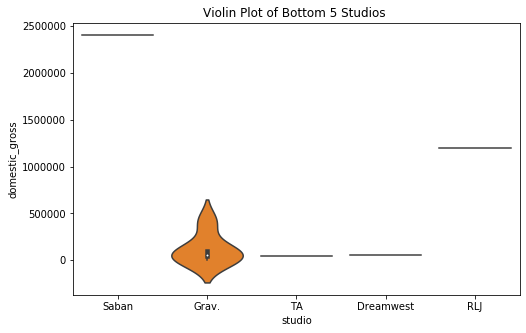

In [93]:
#Domestic gross was used as total_gross generated an empty graph

plt.figure(figsize=(8, 5))
sns.violinplot(x='studio', y='domestic_gross', data=bom_movie_gross.query(f'studio in {bottom_5}'))
plt.title('Violin Plot of Bottom 5 Studios ')
plt.show()

Text(0.5, 1.0, 'Distribution of Sum of Earnings of Studios')

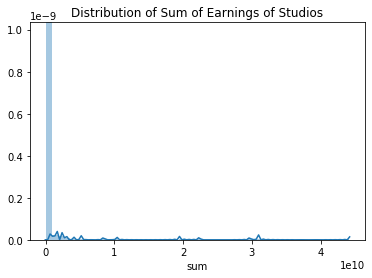

In [94]:
#Obvious need to drop outliers 
from scipy.stats import norm

sns.distplot(studio_gross['sum'])

plt.title('Distribution of Sum of Earnings of Studios')

# What is the relationship between the number of votes and popularity of a film?

Text(0.5, 1.0, 'Scatter Plot of Average Vote and Vote Count')

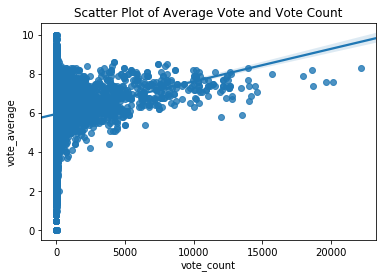

In [95]:
sns.regplot(x = tmdb_movies['vote_count'], y = tmdb_movies['vote_average'])
plt.title('Scatter Plot of Average Vote and Vote Count')

Text(0.5, 1.0, 'Distribution of Average Number of Votes Per Film')

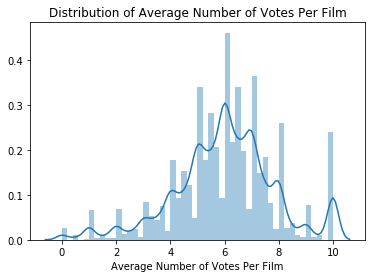

In [96]:
#Distribution of Average Number of Votes 

sns.distplot(tmdb_movies['vote_average'], 
             axlabel= 'Average Number of Votes Per Film')

plt.title('Distribution of Average Number of Votes Per Film')

Text(0.5, 1.0, 'Is the average number of Votes related to popularity?')

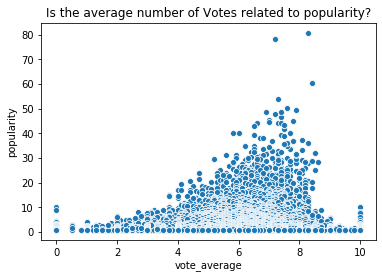

In [97]:
sns.scatterplot(x = tmdb_movies['vote_average'], y = tmdb_movies['popularity'])

plt.title('Is the average number of Votes related to popularity?')

Text(0.5, 1.0, 'Popularity Distribution Plot')

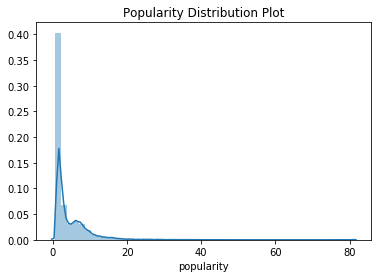

In [98]:
sns.distplot(tmdb_movies['popularity'])
plt.title('Popularity Distribution Plot')

Text(0.5, 1.0, 'Distribution of Average Vote Interval')

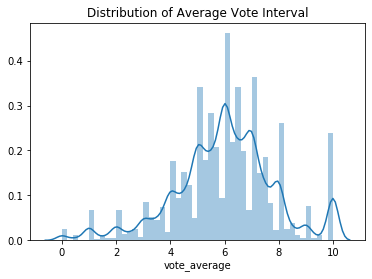

In [99]:
sns.distplot(tmdb_movies['vote_average'])
plt.title('Distribution of Average Vote Interval')

Text(0.5, 1.0, 'Regression Plot of Popularity and Vote Count')

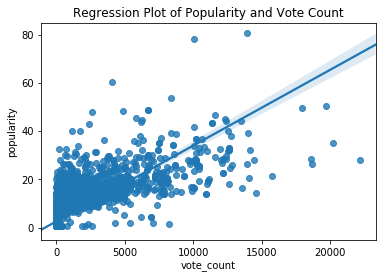

In [100]:
sns.regplot(x='vote_count', y='popularity', data=tmdb_movies)
plt.title('Regression Plot of Popularity and Vote Count')

# What movies have the highest popularity rating? 

In [39]:
tmdb_movies.nlargest(10, 'popularity') #10 most popular movies 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


Text(0.5, 1.0, 'Regression of Average Vote and Popularity')

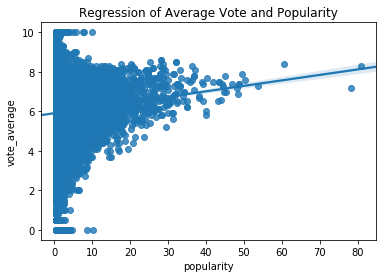

In [105]:
sns.regplot(y=tmdb_movies['vote_average'], x=tmdb_movies['popularity'])
plt.title('Regression of Average Vote and Popularity')

#Indexed by time and created m,d,y columns for future analysis 

# Creating time series formatted data 

In [40]:
#Created time series ready data 
import datetime as dt

In [41]:
time_series =  pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\tmdb.movies.csv", index_col=0, parse_dates=['release_date'])
time_series.dtypes #changing release_date to dtype datetime

genre_ids                    object
id                            int64
original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [42]:
time_series.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26507, 26508, 26509, 26510, 26511, 26512, 26513, 26514, 26515,
            26516],
           dtype='int64', length=26517)

In [43]:
#set date time as the index 

time_series.set_index('release_date')

,genre_ids,id,original_language,original_title,popularity,title,vote_average,vote_count
release_date,,,,,,,,
2010-11-19,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
2010-03-26,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610
2010-05-07,"[12, 28, 878]",10138,en,Iron Man 2,28.515,Iron Man 2,6.8,12368
1995-11-22,"[16, 35, 10751]",862,en,Toy Story,28.005,Toy Story,7.9,10174
2010-07-16,"[28, 878, 12]",27205,en,Inception,27.920,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
2018-10-13,"[27, 18]",488143,en,Laboratory Conditions,0.600,Laboratory Conditions,0.0,1
2018-05-01,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,_EXHIBIT_84xxx_,0.0,1
2018-10-01,"[14, 28, 12]",381231,en,The Last One,0.600,The Last One,0.0,1


In [44]:
time_series.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26507, 26508, 26509, 26510, 26511, 26512, 26513, 26514, 26515,
            26516],
           dtype='int64', length=26517)

In [45]:
#Create columns for years, 
time_series['Year'] = time_series['release_date'].dt.year
time_series['Month'] = time_series['release_date'].dt.month
time_series['Weekday'] = time_series['release_date'].dt.weekday

time_series.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Year,Month,Weekday
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,4
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3,4
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5,4
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11,2
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7,4
